In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Data Source: https://data.boston.gov/dataset/rentsmart
# Desc: Rentals only; Boston; 2016-present (previous years available 'through 1700s')

# "RentSmart Boston compiles data from BOS:311 and the City's Inspectional Services Division
# to give prospective tenants a more complete picture of the homes and apartments they are 
# considering renting, assisting them in understanding any previous issues with the property, 
# including: housing violations, building violations, enforcement violations, housing complaints,
# sanitation requests, and/or civic maintenance requests."

In [ ]:
'''
TODO
- correlations in space, time, building characteristics with complaint number and frequency

'''

In [3]:
data_path = '/Users/bhavanian/housing/property_management_data/RentSmart/20220314_download/tmpdzll6bw0.csv'

In [4]:
df = pd.read_csv(data_path, parse_dates=['date'], dtype={'zip_code':str})

In [5]:
df.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2022-03-13,Enforcement Violations,Improper storage trash: res,"137 W Ninth St, 02127",South Boston,02127,700334000,ONE-37 W NINTH STREET,1920.0,1992.0,Condominium Main*,42.334460,-71.054240
1,2022-03-13,Enforcement Violations,Improper storage trash: res,"141 W Ninth St, 02127",South Boston,02127,700336000,LASOFF STEVEN S,1885.0,1990.0,Residential 3-family,42.334370,-71.054130
2,2022-03-12,Enforcement Violations,Improper storage trash: res,"24-26 Faneuil St, 02135",Brighton,02135,2202558000,LIU ZIYU,1930.0,2015.0,Residential 2-family,42.355008,-71.151007
3,2022-03-12,Enforcement Violations,Improper storage trash: res,"39 Millmont St, 02119",Roxbury,02119,903678000,THREENINEMILLMONT LLC,1900.0,2015.0,Residential 3-family,42.327532,-71.090943
4,2022-03-12,Enforcement Violations,Improper storage trash: res,"19 Park St, 02122",Dorchester,02122,1600041000,CORRIGAN JUSTIN,1890.0,1996.0,Residential 2-family,42.301993,-71.053850


In [6]:
print('Columns with missing values:\n',df.columns[df.isna().any()])

Columns with missing values:
 Index(['description', 'neighborhood', 'year built', 'year remodeled'], dtype='object')


In [7]:
df.shape

(309756, 13)

In [71]:
print('Number of Unique Dataset\n Entries per Field')
df.nunique()


Number of Unique Dataset
 Entries per Field


date              98170
violation_type        6
description         229
address           76480
neighborhood         15
zip_code             30
parcel            50533
owner             45470
year built          224
year remodeled       91
property_type         7
latitude          67354
longitude         67371
dtype: int64

In [9]:
print('Mean Violations Per Address (Raw Entry):',df.groupby('address').date.count().mean(),'Stdev:',df.groupby('address').date.count().std())
df.groupby('address').date.count()

Mean Violations Per Address (Raw Entry): 4.05015690376569 Stdev: 7.653323118261063


address
0 Ping On St, 02111            1
1 A Acorn St, 02108            3
1 A Unity St, 02113            2
1 Abbotsford St, 02121         2
1 Acorn St, 02108              5
                              ..
9A-15 Walk Hill St, 02130      3
9B-9 Garden Court St, 02113    2
9R Salem St, 02129             1
9R Shepard St, 02135           2
9R Winship St #B, 02135        3
Name: date, Length: 76480, dtype: int64

In [10]:
print('Mean Violations Per Owner (Raw Entry):',df.groupby('owner').date.count().mean(),'Stdev:',df.groupby('owner').date.count().std())
df.groupby('owner').date.count()

Mean Violations Per Owner (Raw Entry): 6.812315812623708 Stdev: 17.1371445661462


owner
0NE-50 MAGNOLIA LLC               10
1  ARBORVITAES  LLC               15
1 ARBORVITAES LLC                  6
1 ARION STREET LLC                 5
1 ASPINWALL ROAD REALTY  TRUST     5
                                  ..
ZUREK ANDREW D GELLING             1
ZUROMSKIS CHRISTINE TS            29
ZUROMSKIS J MICHAEL TRST          38
ZVONAR ZORAN                       2
ZYTO AURORE                        1
Name: date, Length: 45470, dtype: int64

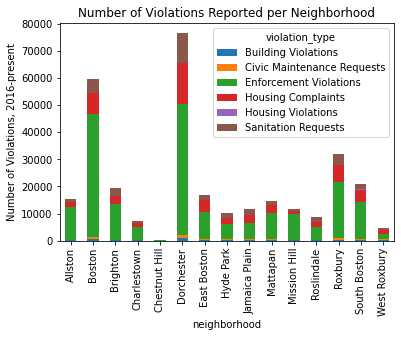

In [12]:
df.groupby('neighborhood').violation_type.value_counts().rename('num_violations_by_neighborhood').unstack().plot.bar(stacked=True)
plt.title('Number of Violations Reported per Neighborhood')
plt.ylabel('Number of Violations, 2016-present')
plt.show()

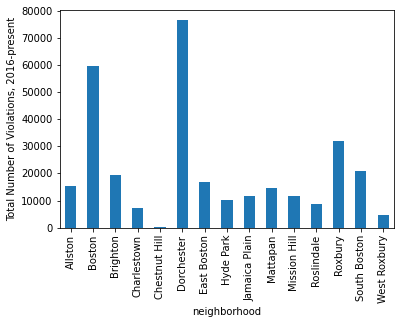

In [13]:
df.groupby('neighborhood').violation_type.count().plot.bar()
plt.ylabel('Total Number of Violations, 2016-present')
plt.show()

In [96]:
print('10 Enforcement Violations Descriptions\n with the Most Number of Reported Cases')
df.loc[df.violation_type == 'Enforcement Violations'].description.value_counts()

10 Enforcement Violations Descriptions
 with the Most Number of Reported Cases


Improper storage trash: res       140058
Overfilling of barrel/dumpster     20336
Overgrown Weeds On Property        14475
Failure clear sidewalk - snow      11643
Illegal dumping < 1 cubic yd        5003
Improper storage trash: com         4203
Occupying City prop wo permit       2515
illegal parking prop owner 1        1716
Unregistered motor vehicles- 2      1260
illegal parking prop owner 2         964
Failure To Register                  828
Unregistered motor vehicles-1        721
Maint a dumpster wopermit            630
Trash illegally dump container       348
Removal snow private prop            302
Failure clear sidewalk - snow:       207
Site Cleanliness license – WAR       186
Failure to secure a Re-Inspect       154
No Number On A Building              136
Failed Multiple Rental Insp          113
Shopping Cart - 1                    103
Graffiti on building- 1              103
Failure to Obtain Inspection         100
Illegal dumping 1-5 cubic yd.:        98
Failure clean si

In [97]:
print('10 Housing Complaints Descriptions\n with the Most Number of Reported Cases')
df.loc[df.violation_type == 'Housing Complaints'].description.value_counts()

10 Housing Complaints Descriptions
 with the Most Number of Reported Cases


Unsatisfactory Living Conditions                   9317
Work w/out Permit                                  6296
Contractors Complaint                              5243
Building Inspection Request                        4209
Pest Infestation - Residential                     3815
Heat - Excessive, Insufficient                     3700
Unsafe Dangerous Conditions                        3551
Working Beyond Hours                               2804
Electrical                                         1955
Protection of Adjoining Property                   1546
Mice Infestation - Residential                     1468
Maintenance - Homeowner                            1291
Exceeding Terms of Permit                          1119
Maintenance Complaint - Residential                1107
Chronic Dampness/Mold                               992
Illegal Occupancy                                   961
Cross Metering - Sub-Metering                       957
Illegal Rooming House                           

In [16]:
print('Mean Housing Complaints Per Owner (Raw Entry):',
      df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].mean(),
      'Stdev:',df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].std(),
     'Max:', df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].max())
df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints']

Mean Housing Complaints Per Owner (Raw Entry): 2.954139399605277 Stdev: 5.6438402063632545 Max: 382.0


owner
0NE-50 MAGNOLIA LLC               6.0
1  ARBORVITAES  LLC               1.0
1 ARBORVITAES LLC                 3.0
1 ARION STREET LLC                1.0
1 ASPINWALL ROAD REALTY  TRUST    2.0
                                 ... 
ZUREK ANDREW D GELLING            1.0
ZUROMSKIS CHRISTINE TS            3.0
ZUROMSKIS J MICHAEL TRST          1.0
ZVONAR ZORAN                      NaN
ZYTO AURORE                       NaN
Name: Housing Complaints, Length: 45470, dtype: float64

In [17]:
df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].nlargest(20)
#uniue properties with reported complaints per owner per units

owner
GBM PORTFOLIO OWNER LLC                382.0
NORTHAMPTON SQ CONDO ASSOC             133.0
JPNDC  PITTS  LLC                      128.0
KASANOF LAND LLC                       121.0
CESCO LLC MASS LLC                     106.0
SOLSKINN PROPERTIES LLC                101.0
WASHINGTON COLUMBIA II MASS LPS         89.0
GEORGETOWNE HOMES ONE LLC MASS LLC      86.0
HARBOR POINT APTS CO LESSEE             85.0
MCKINLEY INVESTMENT GROUP  LLC          76.0
LACONCHA LIMITED PARTNERSHIP            72.0
MERCANTILE WHARF ASSOCIATES             71.0
NEW FRANKLIN PARK LIMITED               69.0
PNC ARHPF BLUE MOUNTAIN APTS LLC        69.0
BISMARCK STREET OWNER LLC               66.0
MILLER DWIGHT                           66.0
FERREIRA JOSE                           65.0
PNC ARHPF NEW PORT ANTONIO APTS LLC     65.0
CHARLES RIVER PARK D COMPANY            64.0
TALBOT BERNARD HOUSING LLC MASS LLC     64.0
Name: Housing Complaints, dtype: float64

In [18]:
df[df.owner == 'GBM PORTFOLIO OWNER LLC'].groupby('address').property_type.value_counts()

address                        property_type               
1 Howland St # 2B, 02121       Residential 7 or more units     2
1 Howland St #1, 02121         Residential 7 or more units     2
1 Howland St #11, 02121        Residential 7 or more units     1
1 Howland St #3, 02121         Residential 7 or more units     4
1 Howland St #6, 02121         Residential 7 or more units     2
                                                              ..
9 River Street Ter # 3, 02136  Residential 4 or more family    1
9 Ruggles St # 1, 02119        Residential 7 or more units     1
9 Ruggles St # 2, 02119        Residential 7 or more units     1
9 Ruggles St # 4, 02119        Residential 7 or more units     1
9 Ruggles St, 02119            Residential 7 or more units     3
Name: property_type, Length: 171, dtype: int64

In [19]:
df[df.owner == 'NORTHAMPTON SQ CONDO ASSOC'].groupby('address').property_type.value_counts().shape

(55,)

In [20]:
df.groupby('owner')['address'].count()

owner
0NE-50 MAGNOLIA LLC               10
1  ARBORVITAES  LLC               15
1 ARBORVITAES LLC                  6
1 ARION STREET LLC                 5
1 ASPINWALL ROAD REALTY  TRUST     5
                                  ..
ZUREK ANDREW D GELLING             1
ZUROMSKIS CHRISTINE TS            29
ZUROMSKIS J MICHAEL TRST          38
ZVONAR ZORAN                       2
ZYTO AURORE                        1
Name: address, Length: 45470, dtype: int64

In [35]:
df['property_type'].unique()

array(['Condominium Main*', 'Residential 3-family',
       'Residential 2-family', 'Residential 7 or more units',
       'Residential 4 or more family', 'Residential 1-family',
       'Mixed Use (Res. and Comm.)'], dtype=object)

In [36]:
df['property_type'].value_counts()

Residential 3-family            74454
Condominium Main*               58908
Residential 2-family            47120
Residential 1-family            42052
Residential 7 or more units     35396
Mixed Use (Res. and Comm.)      27403
Residential 4 or more family    24423
Name: property_type, dtype: int64

In [109]:
num_7prop_owned = df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').address.nunique()

In [110]:
prop7 = df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count()

In [112]:
prop7['num_prop'] = num_7prop_owned

In [116]:
df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned

owner
0NE-50 MAGNOLIA LLC           1.666667
10 SYDNEY STREET LLC          3.000000
10-18 BRAINERD ROAD LLC       2.333333
102 CHANDLER LLC             41.000000
106 WEBSTER LLC              15.500000
                               ...    
YIA YIA REALTY LP MASS LP     4.000000
YOUNG JACOB F III TS          2.800000
ZARBA CHRISTOPHER R           1.500000
ZEENA REALTY LLC              2.333333
ZOLA STEVEN J                20.000000
Length: 1363, dtype: float64

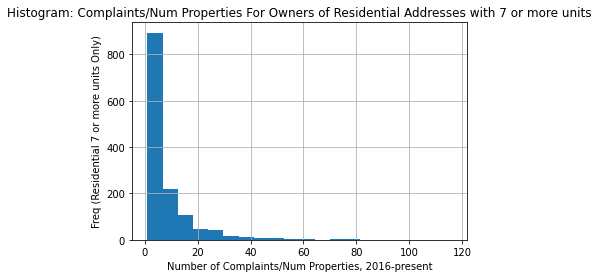

In [123]:

(df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned).hist(bins=20)
plt.xlabel('Number of Complaints/Num Properties, 2016-present')
plt.ylabel('Freq (Residential 7 or more units Only)')
plt.title('Histogram: Complaints/Num Properties For Owners of Residential Addresses with 7 or more units')
plt.show()

In [122]:
print('20 Owners of Residential Addresses with 7\n or More Units with Most Complaints per\n Properties Owned')
(df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned).nlargest(20)
                                                                                                                 #GBM

20 Owners of Residential Addresses with 7
 or More Units with Most Complaints per
 Properties Owned


owner
NEW MASS AVE LLC                       116.0
SHEPARD MONTROSE LLC                    81.0
THREE-79 BEACON ST LIMITED              80.0
FOUR FOUNTAIN PLACE LLC MASS LLC        75.0
EMERALD REALTY CAPITAL LLC MASS LLC     74.0
TWENTY 3 CORTES LLC MASS LLC            66.0
FREEDMAN LILLIAN Z TS                   64.0
VINAL MONTROSE LLC                      62.0
CASTING TANES                           56.0
148 W 9TH ST LLC                        55.0
FERRIS TIMOTHY                          55.0
233 BEACON STREET LLC                   54.0
FIVE-07 BEACON LLC MASS LLC             52.0
FORTY ANDERSON STREET LLC               52.0
LADD MARTIN M JR TRSTS                  52.0
R&R CAPITAL INVESTMENTS LLC             49.0
TORRINGTON WEBB LLC                     48.0
FAIRFIELD 10 LLC                        47.0
256 HOLDINGS LLC                        46.0
FRANKLIN CAPITAL PARTNERS CO            46.0
dtype: float64

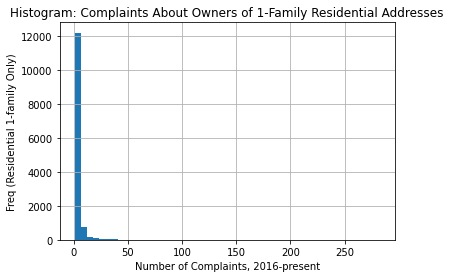

In [81]:
df.loc[df.property_type == 'Residential 1-family'].groupby('owner').date.count().hist(bins=50)
plt.xlabel('Number of Complaints, 2016-present')
plt.ylabel('Freq (Residential 1-family Only)')
plt.title('Histogram: Complaints About Owners of 1-Family Residential Addresses')
plt.show()

In [85]:
print('20 Owners of 1-Family Residential Addresses\n with Most Complaints')
df.loc[df.property_type == 'Residential 1-family'].groupby('owner').date.count().nlargest(20)
# 

20 Owners of 1-Family Residential Addresses
 with Most Complaints


owner
HARVEY VINA                       282
OCALLAGHAN TIMOTHY P TS           166
LIRIANO RICHARD                   163
MARTIN JAMES H III                154
CROWE CORA A                      139
WHITCHER FORREST D                138
WHITEACRE PROPERTIES LLC          130
SCANZIO MARK E                    125
KENNEY REALTY 2 LLC               110
CHANG DEREK T                     102
MCKINLEY INVESTMENT GROUP  LLC     96
BLUE PINE TREE LLC                 85
DIETRICH XAVIER J II               84
PATILLO DELORES                    83
PRICE HERBERT C                    83
HAMILTON FRANCIS                   78
FALCUCCI PROPERTIES LLC            72
CAMPBELL TREVON                    69
HODGE WILLIAM                      67
U S BANK TRUST N A                 62
Name: date, dtype: int64

In [21]:
df.loc[df.owner.str.contains('GBM PORTFOLIO OWNER LLC') & (df.violation_type == 'Housing Complaints')]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
1460,2022-03-01 13:26:00.000,Housing Complaints,"Heat - Excessive, Insufficient","85 Tennis Rd #302, 02126",Mattapan,02126,1803081000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Mixed Use (Res. and Comm.),42.27711,-71.09694
2038,2022-02-27 16:22:00.000,Housing Complaints,"Heat - Excessive, Insufficient","15 Ruggles St # 3, 02119",Roxbury,02119,902452000,GBM PORTFOLIO OWNER LLC,1899.0,2015.0,Residential 7 or more units,42.33162,-71.08321
2517,2022-02-24 15:22:00.000,Housing Complaints,Maintenance Complaint - Residential,"1 Rosa St # 103, 02136",Hyde Park,02136,1807006000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.26162,-71.11198
2518,2022-02-24 14:40:00.000,Housing Complaints,Pest Infestation - Residential,"89 Tennis Rd #301, 02126",Mattapan,02126,1803085000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.27744,-71.09734
3414,2022-02-17 12:42:00.000,Housing Complaints,Unsatisfactory Living Conditions,"498 Norfolk St #202, 02126",Mattapan,02126,1800830000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.27933,-71.08883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306096,2017-04-28 10:22:00.000,Housing Complaints,Cross Metering - Sub-Metering,"1037 River St #6, 02136",Hyde Park,02136,1808175000,GBM PORTFOLIO OWNER LLC,1970.0,1980.0,Residential 7 or more units,42.25989,-71.11716
306122,2017-04-28 06:57:00.000,Housing Complaints,Electrical,"80 Hiawatha Rd, 02126",Mattapan,02126,1803109001,GBM PORTFOLIO OWNER LLC,1965.0,1985.0,Residential 7 or more units,42.27764,-71.09706
306123,2017-04-28 06:53:00.000,Housing Complaints,Maintenance Complaint - Residential,"80 Hiawatha Rd, 02126",Mattapan,02126,1803109001,GBM PORTFOLIO OWNER LLC,1965.0,1985.0,Residential 7 or more units,42.27764,-71.09706
306124,2017-04-28 06:51:25.580,Housing Complaints,Building Inspection Request,"80 Hiawatha Rd, 02126",Mattapan,02126,1803109001,GBM PORTFOLIO OWNER LLC,1965.0,1985.0,Residential 7 or more units,42.27764,-71.09706


In [55]:
violations_byproptype_byowner = df.groupby(['owner','property_type']).date.count().unstack()
violations_byproptype_byowner

property_type,Condominium Main*,Mixed Use (Res. and Comm.),Residential 1-family,Residential 2-family,Residential 3-family,Residential 4 or more family,Residential 7 or more units
owner,,,,,,,
0NE-50 MAGNOLIA LLC,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1 ARBORVITAES LLC,NaN,NaN,NaN,NaN,15.0,NaN,NaN
1 ARBORVITAES LLC,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1 ARION STREET LLC,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1 ASPINWALL ROAD REALTY TRUST,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...
ZUREK ANDREW D GELLING,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ZUROMSKIS CHRISTINE TS,NaN,NaN,NaN,NaN,NaN,29.0,NaN
ZUROMSKIS J MICHAEL TRST,NaN,38.0,NaN,NaN,NaN,NaN,NaN


In [66]:
violations_byproptype_byowner.describe()

property_type,Condominium Main*,Mixed Use (Res. and Comm.),Residential 1-family,Residential 2-family,Residential 3-family,Residential 4 or more family,Residential 7 or more units
count,7742.000000,1802.000000,13355.000000,10824.000000,10028.000000,2016.000000,1363.000000
mean,7.608887,15.206992,3.148783,4.353289,7.424611,12.114583,25.969186
std,12.456739,22.584455,6.408323,7.547227,12.589078,14.912391,61.949856
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,6.000000
50%,4.000000,8.000000,2.000000,2.000000,4.000000,7.000000,14.000000
75%,9.000000,17.000000,3.000000,5.000000,8.000000,15.000000,29.000000
max,362.000000,246.000000,282.000000,244.000000,322.000000,163.000000,1911.000000


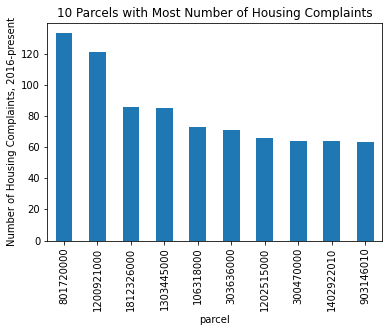

In [176]:
# Is there association of building characteristics,geography and loc with num housing complaints (next, type of housing complaints)
#next add month

df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10).plot.bar()
plt.title('10 Parcels with Most Number of Housing Complaints')
plt.ylabel('Number of Housing Complaints, 2016-present')
plt.show()

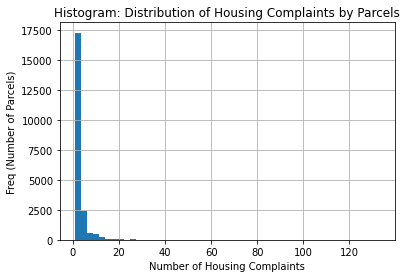

In [93]:
df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().hist(bins=50)
plt.title('Histogram: Distribution of Housing Complaints by Parcels')
plt.xlabel('Number of Housing Complaints')
plt.ylabel('Freq (Number of Parcels)')
plt.show()

In [95]:
print('10 Parcels with the Most Housing Complaints')
df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10)

10 Parcels with the Most Housing Complaints


parcel
801720000     133
1200921000    121
1812326000     86
1303445000     85
106318000      73
303636000      71
1202515000     66
300470000      64
1402922010     64
903146010      63
Name: violation_type, dtype: int64

In [25]:
# Don't have data on total number of properties of different property types, only those of at least one complaint
# df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('property_type').violation_type.count().plot.bar()
# plt.title('Number of Housing Complaints By Property Type')
# plt.ylabel('Number of Housing Complaints, 2016-present')
# plt.show()

In [26]:
worst_parcels = set(list(df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10).index))


In [27]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].owner.value_counts()

NORTHAMPTON SQ CONDO ASSOC             133
KASANOF LAND LLC                       121
GEORGETOWNE HOMES ONE LLC MASS LLC      86
HARBOR POINT APTS CO LESSEE             85
MCKINLEY INVESTMENT GROUP  LLC          73
MERCANTILE WHARF ASSOCIATES             71
MILLER DWIGHT                           66
CHARLES RIVER PARK D COMPANY            64
TALBOT BERNARD HOUSING LLC MASS LLC     64
DARTMOUTH HOTEL LP                      63
Name: owner, dtype: int64

In [28]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].description.value_counts()

Unsatisfactory Living Conditions                   228
Heat - Excessive, Insufficient                      81
Contractors Complaint                               57
Pest Infestation - Residential                      52
Chronic Dampness/Mold                               45
Mice Infestation - Residential                      38
Building Inspection Request                         34
No Utilities Residential - Water                    33
Unsafe Dangerous Conditions                         32
Bed Bugs                                            31
Maintenance Complaint - Residential                 30
Unsatisfactory Utilities - Electrical, Plumbing     25
Working Beyond Hours                                25
Maintenance - Homeowner                             23
Electrical                                          14
Work w/out Permit                                   12
Exceeding Terms of Permit                           10
Poor Ventilation                                     9
Egress    

In [29]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].neighborhood.value_counts()

Roxbury        317
Dorchester     215
Boston         135
Hyde Park       86
East Boston     73
Name: neighborhood, dtype: int64

In [30]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].property_type.value_counts()

Mixed Use (Res. and Comm.)     490
Condominium Main*              133
Residential 1-family            73
Residential 3-family            66
Residential 7 or more units     64
Name: property_type, dtype: int64

In [31]:
df.loc[df.owner.str.contains('ARBORVITAES')].owner

30223     1  ARBORVITAES  LLC
30769     1  ARBORVITAES  LLC
45590     1  ARBORVITAES  LLC
57163       1 ARBORVITAES LLC
58658       1 ARBORVITAES LLC
59331       1 ARBORVITAES LLC
62962     1  ARBORVITAES  LLC
62986     1  ARBORVITAES  LLC
63434     1  ARBORVITAES  LLC
67751     1  ARBORVITAES  LLC
67753     1  ARBORVITAES  LLC
104883    1  ARBORVITAES  LLC
108504    1  ARBORVITAES  LLC
114845    1  ARBORVITAES  LLC
115670    1  ARBORVITAES  LLC
128569    1  ARBORVITAES  LLC
207715    1  ARBORVITAES  LLC
251945    1  ARBORVITAES  LLC
262176      1 ARBORVITAES LLC
265600      1 ARBORVITAES LLC
266905      1 ARBORVITAES LLC
Name: owner, dtype: object

In [42]:
vocab = set([tok for sent in df.owner.unique() for tok in sent.split()])

In [133]:
# vocab